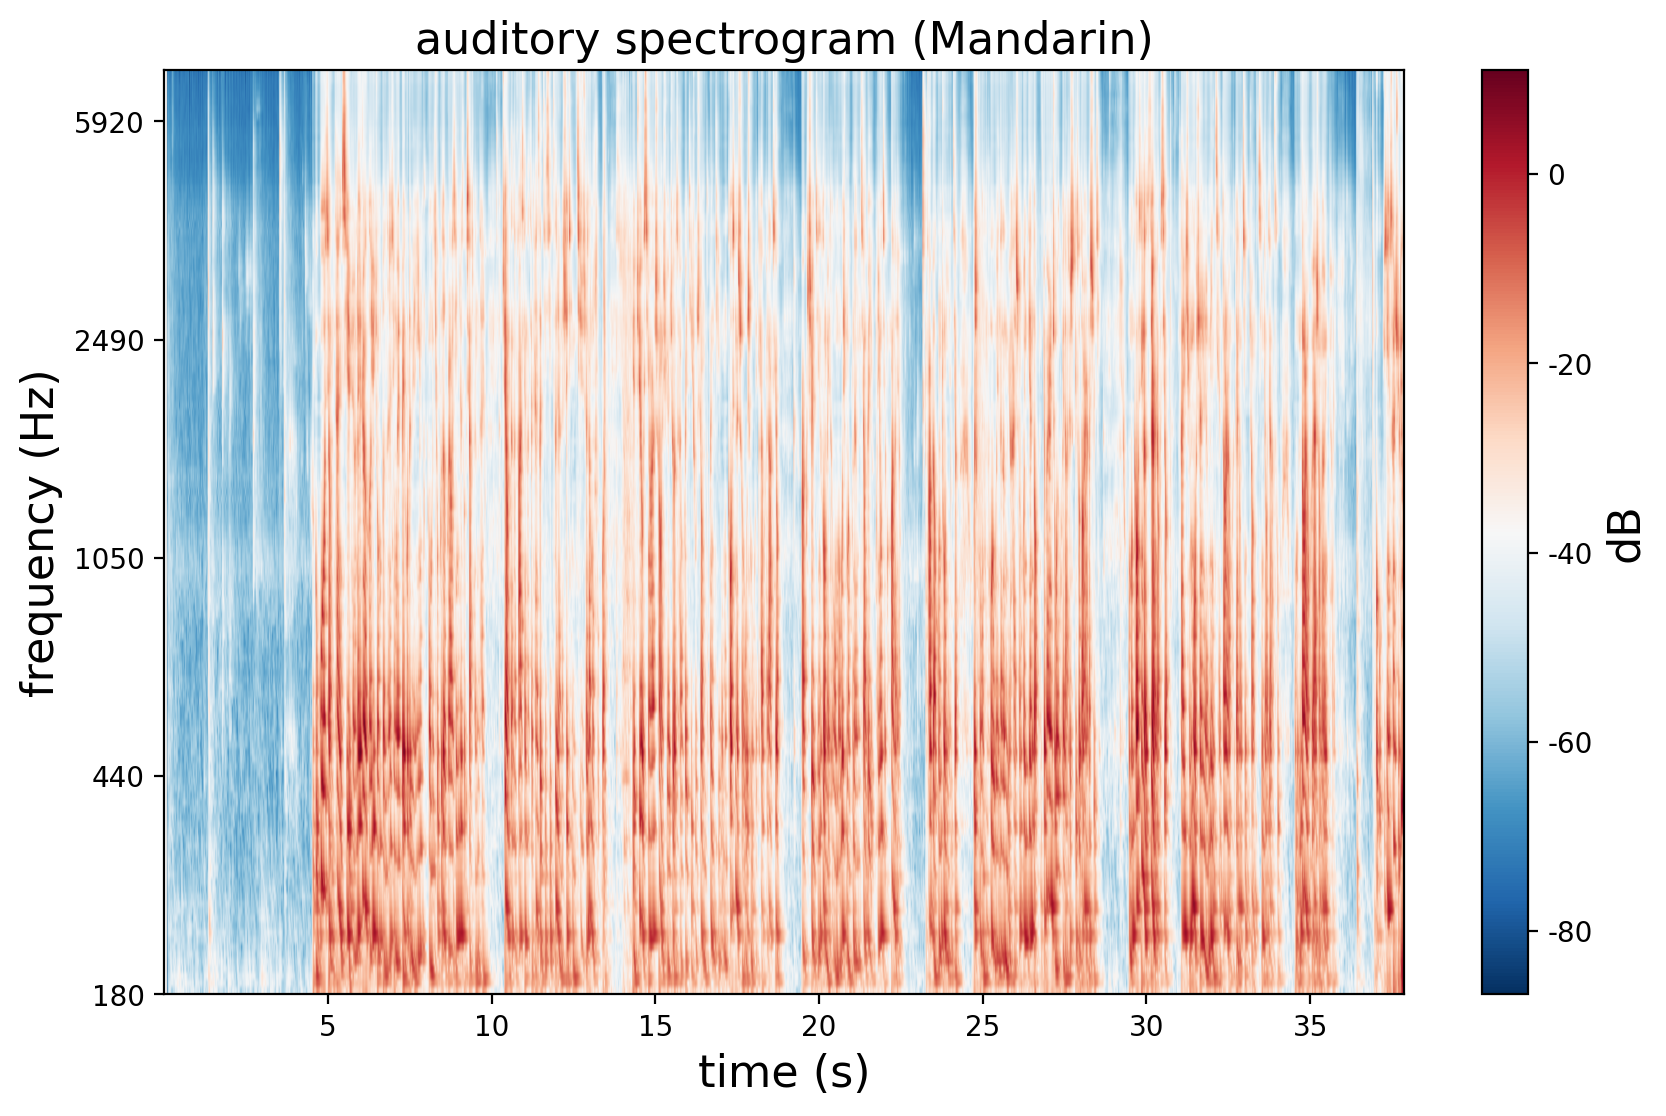

In [16]:
from pylab import *
import scipy.io as scio
import warnings
warnings.filterwarnings("ignore")
rcParams['font.family'] = ['DejaVu Sans','Simhei']


v = scio.loadmat('materials/shuohua.mat')['v']
cf = scio.loadmat('materials/shuohua_cf.mat')['cf']
v_db = 20 * np.log10(np.maximum(v, 0))

fig = figure(figsize=(10, 6),dpi=200)
ax = fig.add_subplot(111)
# Create the spectrogram plot
ax.imshow(v_db.T, aspect='auto', origin='lower',
           extent=[1/v.shape[0]/200, v.shape[0]/200, 1, 128],
           cmap=cm.RdBu_r)  # or another colormap of your choice

# Set y-axis ticks and labels
cf_list = [cf[0][i] for i in np.arange(1,129,30)]
ax.set_yticks(np.arange(1, 129, 30), cf_list)  # assuming cf is defined elsewhere

# Add labels and title
ax.set_xlabel('time (s)',fontsize=16)
ax.set_ylabel('frequency (Hz)',fontsize=16)
ax.set_title('auditory spectrogram (Mandarin)',fontsize=16)

# Add colorbar
cbar = fig.colorbar(ax.images[0], ax=ax)
cbar.set_label('dB',fontsize=16)
# Save the v (optional)
# np.save('materials/shuohua.npy', v)
# Save the figure
fig.savefig('manuscript/figure/shuohua.png', dpi=300,bbox_inches='tight')
show()